In [47]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import math
import warnings

from IPython.display import display
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)



In [48]:
df = pd.read_csv('New_York.csv', header=4, skipfooter=3)
df.head()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,4,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,5,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,6,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,7,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,8,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [49]:
df.columns = ['List', 'City', 'Population', 'Violent crime', 'Murder', 'Rape1', 'Rape2', 'Robbery', 'Assault', 'Property crime', 'Burglary', 'Larceny', 'Car theft', 'Arson']

In [50]:
df.head()

,List,City,Population,Violent crime,Murder,Rape1,Rape2,Robbery,Assault,Property crime,Burglary,Larceny,Car theft,Arson
0,4,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,5,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,6,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,7,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,8,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [51]:
NY = pd.DataFrame(df)

In [52]:
NY.isnull().sum()

List                0
City                0
Population          0
Violent crime       0
Murder              0
Rape1             348
Rape2               0
Robbery             0
Assault             0
Property crime      0
Burglary            0
Larceny             0
Car theft           0
Arson             161
dtype: int64

In [53]:
NY.shape

(348, 14)

In [54]:
NY = NY.drop("Rape1",axis=1)

In [55]:
NY = NY.drop("Arson",axis=1)

In [56]:
NY = NY[NY.City != "New York"]

**Creating dummy variables for Murder and Robbery

In [57]:
NY['Murder1'] = np.where(NY['Murder'] > 0, 1,0)

In [58]:
NY['Robbery1'] = np.where(NY['Robbery'] >0, 1, 0)

**Transforming population into population sqared**

In [59]:
NY['Population2'] = (NY['Population'])^2 

In [60]:
NY = NY.replace(0, 0.00001)

**Evaluation histograms of population**

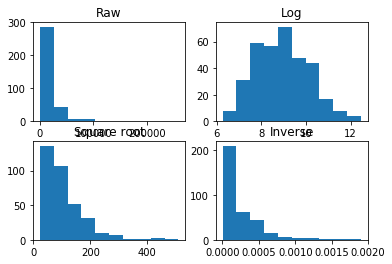

In [61]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(NY['Population'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(NY['Population']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(NY['Population']))
plt.title('Square root')
         
fig.add_subplot(224)
plt.hist(1/NY['Population'])
plt.title('Inverse')
         
plt.show()



In [62]:
NY['Log_Population'] = (np.log(NY['Population']))
NY['Sqrt_Population'] = (np.sqrt(NY['Population']))
NY['Inverse_Population'] = (1/NY['Population'])

**Evaluating histograms of population squared**

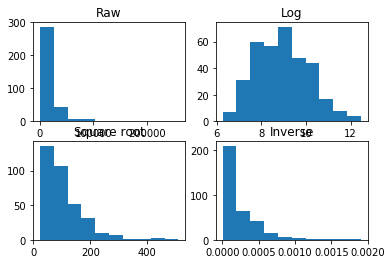

In [63]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(NY['Population2'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(NY['Population2']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(NY['Population2']))
plt.title('Square root')
         
fig.add_subplot(224)
plt.hist(1/NY['Population2'])
plt.title('Inverse')
         
plt.show()



In [64]:
NY['Log_Population2'] = (np.log(NY['Population2']))
NY['Sqrt_Population2'] = (np.sqrt(NY['Population2']))
NY['Inverse_Population2'] = (1/NY['Population2'])

## Shapiro test for 'Population'

In [65]:
print(scipy.stats.shapiro(NY['Population']))
print(scipy.stats.shapiro(np.sqrt(NY['Population'])))
print(scipy.stats.shapiro(np.log(NY['Population'])))
print(scipy.stats.shapiro(1/NY['Population']))

(0.5105308294296265, 7.350959377160963e-30)
(0.8205825090408325, 2.378172178435628e-19)
(0.9889013767242432, 0.009643996134400368)
(0.7455079555511475, 9.78108699492405e-23)


**Population log is the most robust**

## Shapiro test for 'Population 2'

In [66]:
print(scipy.stats.shapiro(NY['Population2']))
print(scipy.stats.shapiro(np.sqrt(NY['Population2'])))
print(scipy.stats.shapiro(np.log(NY['Population2'])))
print(scipy.stats.shapiro(1/NY['Population2']))

(0.5105323791503906, 7.351597341455041e-30)
(0.8205920457839966, 2.38085586253548e-19)
(0.9889208674430847, 0.009751972742378712)
(0.7451249361038208, 9.444695247921188e-23)


**Population2 log is the most robust**

## Checking correlations

In [72]:
NY._get_numeric_data().corr()

,List,Population,Violent crime,Murder,Rape2,Robbery,Assault,Property crime,Burglary,Larceny,Car theft,Murder1,Robbery1,Population2,Log_Population,Sqrt_Population,Inverse_Population,Log_Population2,Sqrt_Population2,Inverse_Population2
List,1.000,0.047,0.022,0.032,0.019,0.016,0.025,0.017,0.021,0.015,0.021,0.126,0.035,0.047,0.072,0.066,-0.054,0.072,0.066,-0.054
Population,0.047,1.000,0.829,0.756,0.797,0.816,0.835,0.887,0.820,0.901,0.828,0.503,0.344,1.000,0.736,0.928,-0.380,0.736,0.928,-0.380
Violent crime,0.022,0.829,1.000,0.955,0.962,0.994,0.997,0.944,0.971,0.913,0.987,0.406,0.168,0.829,0.418,0.641,-0.165,0.418,0.641,-0.165
Murder,0.032,0.756,0.955,1.000,0.946,0.963,0.938,0.917,0.956,0.881,0.959,0.408,0.132,0.756,0.354,0.566,-0.131,0.354,0.566,-0.131
Rape2,0.019,0.797,0.962,0.946,1.000,0.949,0.958,0.949,0.974,0.921,0.960,0.403,0.189,0.797,0.424,0.628,-0.182,0.424,0.628,-0.182
Robbery,0.016,0.816,0.994,0.963,0.949,1.000,0.983,0.933,0.964,0.898,0.989,0.378,0.154,0.816,0.394,0.619,-0.150,0.394,0.619,-0.150
Assault,0.025,0.835,0.997,0.938,0.958,0.983,1.000,0.942,0.964,0.913,0.977,0.422,0.176,0.835,0.432,0.653,-0.174,0.432,0.653,-0.174
Property crime,0.017,0.887,0.944,0.917,0.949,0.933,0.942,1.000,0.977,0.995,0.949,0.443,0.267,0.887,0.550,0.755,-0.257,0.550,0.755,-0.257
Burglary,0.021,0.820,0.971,0.956,0.974,0.964,0.964,0.977,1.000,0.950,0.976,0.402,0.197,0.820,0.449,0.656,-0.194,0.449,0.656,-0.193
Larceny,0.015,0.901,0.913,0.881,0.921,0.898,0.913,0.995,0.950,1.000,0.916,0.458,0.297,0.901,0.590,0.788,-0.284,0.590,0.788,-0.284


## Model

In [73]:
X = NY[['Population', 'Population2','Murder1', 'Robbery1']] 
y = NY['Property crime']

In [74]:
import statsmodels.api as sm

In [75]:
est = sm.OLS(y, X) 
estres = est.fit() 
print(estres.summary()) 
ypred = estres.predict(X) 
print(ypred)

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     367.9
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          1.19e-122
Time:                        10:13:12   Log-Likelihood:                -2634.2
No. Observations:                 347   AIC:                             5276.
Df Residuals:                     343   BIC:                             5292.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Population      0.5127     12.953      0.040      

**all p-values except for Robbery 1 are over the .05 threshold** 

## Model 2 with log

In [76]:
X_1 = NY[['Log_Population', 'Log_Population2','Murder1', 'Robbery1']] 
y = NY['Property crime']

In [77]:
est = sm.OLS(y, X_1) 
estres = est.fit() 
print(estres.summary()) 
ypred_1 = estres.predict(X_1) 
print(ypred_1)

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     39.84
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           2.09e-27
Time:                        10:13:12   Log-Likelihood:                -2857.0
No. Observations:                 347   AIC:                             5722.
Df Residuals:                     343   BIC:                             5737.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Population   1.471e+04   6.66e+04     

**all p-values except for Murder 1 are over the .05 threshold**

In [78]:
X_2 = NY[['Population','Murder1', 'Robbery1']] 
y = NY['Property crime']

In [79]:
est = sm.OLS(y, X_2) 
estres = est.fit() 
print(estres.summary()) 

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     491.9
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          4.93e-124
Time:                        10:13:12   Log-Likelihood:                -2634.2
No. Observations:                 347   AIC:                             5274.
Df Residuals:                     344   BIC:                             5286.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population     0.0340      0.001     30.173      0.0

**Without population 2, population and robbery have a p-value of 0.  Murder1 still has a high p-value

In [80]:
X_3 = NY[['Population','Population2', 'Robbery1']] 
y = NY['Property crime']

In [81]:
est = sm.OLS(y, X_3) 
estres = est.fit() 
print(estres.summary()) 

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     491.8
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          5.11e-124
Time:                        10:13:12   Log-Likelihood:                -2634.3
No. Observations:                 347   AIC:                             5275.
Df Residuals:                     344   BIC:                             5286.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Population      0.4420     12.933      0.034      

In [82]:
X_4 = NY[['Population','Population2', 'Murder1']] 
y = NY['Property crime']

In [83]:
est = sm.OLS(y, X_4) 
estres = est.fit() 
print(estres.summary()) 

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     455.4
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          2.12e-119
Time:                        10:13:12   Log-Likelihood:                -2645.0
No. Observations:                 347   AIC:                             5296.
Df Residuals:                     344   BIC:                             5308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Population      2.3323     13.336      0.175      

In [84]:
X_5 = NY[['Population', 'Murder1']] 
y = NY['Property crime']

In [85]:
est = sm.OLS(y, X_5) 
estres = est.fit() 
print(estres.summary()) 

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     685.0
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          7.27e-121
Time:                        10:13:12   Log-Likelihood:                -2645.0
No. Observations:                 347   AIC:                             5294.
Df Residuals:                     345   BIC:                             5302.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population     0.0318      0.001     30.229      0.0

In [86]:
X_6 = NY[['Population', 'Robbery1']] 
y = NY['Property crime']

In [87]:
est = sm.OLS(y, X_6) 
estres = est.fit() 
print(estres.summary()) 

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     739.8
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          1.66e-125
Time:                        10:13:12   Log-Likelihood:                -2634.3
No. Observations:                 347   AIC:                             5273.
Df Residuals:                     345   BIC:                             5280.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population     0.0342      0.001     33.819      0.0

In [88]:
X_7 = NY[['Burglary', 'Larceny']] 
y = NY['Property crime']

In [89]:
est = sm.OLS(y, X_7) 
estres = est.fit() 
print(estres.summary()) 

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.909e+05
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               0.00
Time:                        10:13:12   Log-Likelihood:                -1421.4
No. Observations:                 347   AIC:                             2847.
Df Residuals:                     345   BIC:                             2855.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Burglary       1.2843      0.009    144.934      0.0

In [90]:
X_7 = NY[['Burglary', 'Larceny', 'Population', 'Robbery']] 
y = NY['Property crime']

In [91]:
est = sm.OLS(y, X_7) 
estres = est.fit() 
print(estres.summary()) 

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.630e+06
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               0.00
Time:                        10:15:20   Log-Likelihood:                -1213.8
No. Observations:                 347   AIC:                             2436.
Df Residuals:                     343   BIC:                             2451.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Burglary       1.0986      0.010    109.933      0.0

In [92]:
X_8 = NY[['Burglary', 'Larceny', 'Population']] 
y = NY['Property crime']

In [93]:
est = sm.OLS(y, X_8) 
estres = est.fit() 
print(estres.summary()) 

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.777e+05
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               0.00
Time:                        10:16:30   Log-Likelihood:                -1392.6
No. Observations:                 347   AIC:                             2791.
Df Residuals:                     344   BIC:                             2803.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Burglary       1.3099      0.009    149.081      0.0

**Population squared and murder when regressed on Property crime are not statistically significant.  I included other variables that had strong correlations with Property crime, Burglary and Larceny.  As a result the model became more robust.  But the R2 score is so strong there might be a problem with overfitting.  Buglary and Larceny are correlated with each other.** 

In [94]:
X_9 = NY[['Burglary', 'Population']] 
y = NY['Property crime']

In [101]:
est = sm.OLS(y, X_9) 
estres = est.fit() 
print(estres.summary()) 
ypred_9 = estres.predict(X_9) 
print(ypred_9)

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     8239.
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          6.39e-292
Time:                        10:37:10   Log-Likelihood:                -2248.9
No. Observations:                 347   AIC:                             4502.
Df Residuals:                     345   BIC:                             4509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Burglary       2.9496      0.053     55.164      0.0

In [109]:
actual = NY['Property crime']
residual_9 = actual - ypred_9

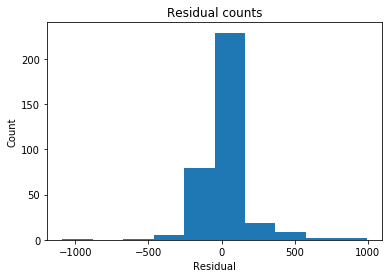

In [111]:
plt.hist(residual_9)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

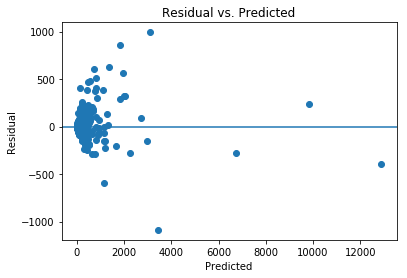

In [116]:
plt.scatter(ypred_9, residual_9)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [118]:
X_10 = NY[['Larceny', 'Population']] 
y = NY['Property crime']

In [119]:
est = sm.OLS(y, X_10) 
estres = est.fit() 
print(estres.summary()) 
ypred_10 = estres.predict(X_10) 
print(ypred_10)

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.766e+04
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               0.00
Time:                        10:48:58   Log-Likelihood:                -2118.5
No. Observations:                 347   AIC:                             4241.
Df Residuals:                     345   BIC:                             4249.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Larceny        1.5214      0.018     82.697      0.0

**Population has a negative coefficient when regressed with larceny but does not have a negative coefficient when regressed with burlgary

In [120]:
actual = NY['Property crime']
residual_10 = actual - ypred_10

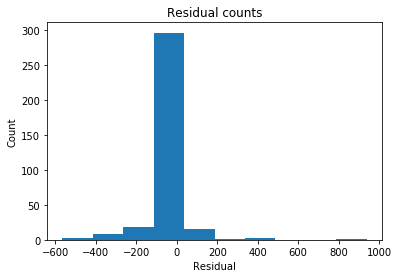

In [121]:
plt.hist(residual_10)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

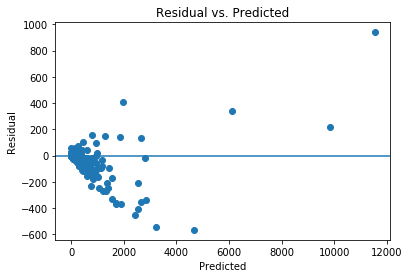

In [122]:
plt.scatter(ypred_10, residual_10)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [126]:
X_11 = NY[['Robbery', 'Population']] 
y = NY['Property crime']

In [127]:
est = sm.OLS(y, X_11) 
estres = est.fit() 
print(estres.summary()) 
ypred_11 = estres.predict(X_11) 
print(ypred_11)

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     2206.
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          2.74e-197
Time:                        10:56:42   Log-Likelihood:                -2468.0
No. Observations:                 347   AIC:                             4940.
Df Residuals:                     345   BIC:                             4948.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Robbery        6.6112      0.267     24.759      0.0

In [128]:
actual = NY['Property crime']
residual_11 = actual - ypred_11

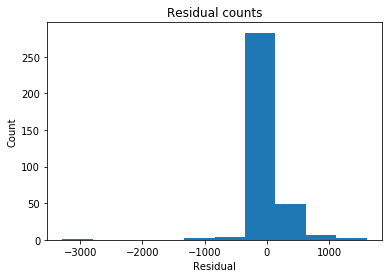

In [129]:
plt.hist(residual_11)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

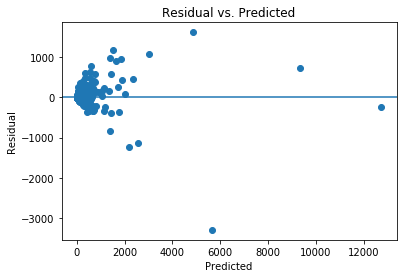

In [130]:
plt.scatter(ypred_11, residual_11)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [131]:
print(scipy.stats.shapiro(residual_9))
print(scipy.stats.shapiro(residual_10))
print(scipy.stats.shapiro(residual_11))

(0.7332791090011597, 3.2616855143330406e-23)
(0.6238279938697815, 7.206644962622375e-27)
(0.5967795848846436, 1.2161093003803734e-27)


**Burglary and Population have the best fit.  Looking at the residuals they have the strongest t-values.  The R2 is .97 therefore this model explains 97% of variance.  